## 신경망 개요
# 신경망 개념

<img src='https://icdn6.digitaltrends.com/image/artificial_neural_network_1-640x640.jpg' /><br>
(출처: https://www.digitaltrends.com/cool-tech/what-is-an-artificial-neural-network/)

### 머신러닝 개념
<img src='머신러닝개념.jpg' /><br>
- **출력값과 목표값의 차이**를 **최소화**하는 것이 목표이다.
- 관련 용어 : 비용(cost), 손실(loss), 에러(error)
- 비용함수(Cost function) : 출력값과 목표값의 차이를 수치화
- 즉, 비용함수를 정의하고 이를 최소화하려고 한다.

### 비용함수 종류
- MSE(Mean Squared Error) : 회귀에 주로 사용
- MAE(Mean Absolute Error) : 상동
- Binary Cross Entropy : 이진 분류에 사용 (클래스가 2개)
- Cross Entropy : 다중 분류에 사용 (클래스가 3개 이상)

### MSE
$$ MSE = \frac{1}{N} \cdot \sum_{i=0}^{N-1} (y_i - \hat{y_i})^2 $$

### 예제1
- 입력값 x = [1,2,3]
- 목표값 y = [3,5,7]
- 입력값이 주어졌을 때 어떻게 출력값을 예측할까?
> - $ \hat{y} = w \cdot x + b $ 이라고 가정하고, w 와 b 값을 찾는다.
> - 여기서 w 를 **가중치**, b 를 **절편(편향값)** 이라고 한다.
> - 이 문제에서 w=2, b=1 임을 알 수 있다.

### 예제2
- 입력값 x = [1,2,3]
- 목표값 y = [3,5,9]
- 이 경우는 어떻게 예측할까?
> - 위와 마찬가지로 $ \hat{y} = w \cdot x + b $ 이라고 가정한다.
> - 하지만 딱 맞아떨어지는 w 와 b 값을 찾지 못한다.
> - 예측값 = 2*x + 1 이라고 놓아 보자.
> - 그러면, 예측값 = [3,5,7] 이 된다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x = np.array([1,2,3])
y = np.array([3,5,9])

In [8]:
w = 2
b = 1
pred_y = w*x + b
display(pred_y)

array([3, 5, 7])

In [9]:
### Error
delta_y = y - pred_y
delta_y

array([0, 0, 2])

In [10]:
mse = np.sum(delta_y**2)/len(y)
mse

1.3333333333333333

### 예제3
- 비용함수인 MSE 값이 1.33 이 나왔다
- 이 값을 최소화하여야 한다
- 비용함수는 w 와 b 에 따라 달라짐을 볼 수 있다 (비용함수는 w와 b의 함수임)
- w 와 b 의 값을 어떻게 조정할까?

> 먼저, w 를 조금 증가시켜 보자

In [11]:
w = 2.1
b = 1
pred_y = w*x + b
display(pred_y)

array([3.1, 5.2, 7.3])

In [12]:
### Error
delta_y = y - pred_y
delta_y

array([-0.1, -0.2,  1.7])

In [13]:
mse = np.sum(delta_y**2)/len(y)
mse

0.9799999999999992

> w 를 조금 감소시켜 보자

In [17]:
w = 1.9
b = 1
pred_y = w*x + b
display(pred_y)

array([2.9, 4.8, 6.7])

In [18]:
### Error
delta_y = y - pred_y
delta_y

array([0.1, 0.2, 2.3])

In [19]:
mse = np.sum(delta_y**2)/len(y)
mse

1.7800000000000011

> 마찬가지로 b 를 조정해 보자

In [20]:
w = 2
b = 1.1
pred_y = w*x + b
display(pred_y)

array([3.1, 5.1, 7.1])

In [21]:
### Error
delta_y = y - pred_y
delta_y

array([-0.1, -0.1,  1.9])

In [22]:
mse = np.sum(delta_y**2)/len(y)
mse

1.2100000000000004

In [23]:
w = 2
b = 0.9
pred_y = w*x + b
display(pred_y)

array([2.9, 4.9, 6.9])

In [24]:
### Error
delta_y = y - pred_y
delta_y

array([0.1, 0.1, 2.1])

In [25]:
mse = np.sum(delta_y**2)/len(y)
mse

1.476666666666666

- 결과적으로 w 와 b 모두 조금씩 증가시키면 MSE 값이 작아짐을 알 수 있다
- 이런 과정을 계속 반복하면 w 와 b 의 근사값을 구할 수 있다

### 경사하강법 적용
- 위와 같이, 비용함수를 줄여나가기 위해 w 와 b 를 반복해서 조정하는 방법이 경사하강법이다

In [68]:
x = np.array([1,2,3])
y = np.array([3,5,9])

In [69]:
### 초기값 설정
w = 2
b = 1
pred_y = w*x + b
delta_y = y - pred_y
mse = np.sum(delta_y**2)/len(y)
mse_log = [mse]

for i in range(100):
    new_w = w
    new_b = b
    
    mse_1 = np.sum((y-((w+0.1)*x+b))**2)/len(y)
    mse_2 = np.sum((y-((w-0.1)*x+b))**2)/len(y)
    mse_3 = np.sum((y-(w*x+(b+0.1)))**2)/len(y)
    mse_4 = np.sum((y-(w*x+(b-0.1)))**2)/len(y)
    t_mse = np.array([mse_1, mse_2, mse_3, mse_4])
    
    if mse < np.min(t_mse): break
    
    if mse_1<=mse_2 and mse_1<mse:
        new_w = w+0.1
    elif mse_1>mse_2 and mse_2<mse:
        new_w = w-0.1
        
    if mse_3<=mse_4 and mse_3<mse:
        new_b = b+0.1
    elif mse_3>mse_4 and mse_4<mse:
        new_b = b-0.1
        
    w = new_w
    b = new_b
    mse = np.sum((y-(w*x+b))**2)/len(y)
    mse_log.append(mse)
    print('%05d> %.5f, %.5f, %.5f' % (i, w, b, mse))

00000> 2.10000, 1.10000, 0.89667
00001> 2.20000, 1.20000, 0.65333
00002> 2.30000, 1.30000, 0.60333
00003> 2.30000, 1.20000, 0.56667
00004> 2.30000, 1.10000, 0.55000
00005> 2.40000, 1.10000, 0.51667
00006> 2.40000, 1.00000, 0.48000
00007> 2.40000, 0.90000, 0.46333
00008> 2.50000, 0.90000, 0.44333
00009> 2.50000, 0.80000, 0.40667
00010> 2.50000, 0.70000, 0.39000
00011> 2.60000, 0.70000, 0.38333
00012> 2.60000, 0.60000, 0.34667
00013> 2.60000, 0.50000, 0.33000


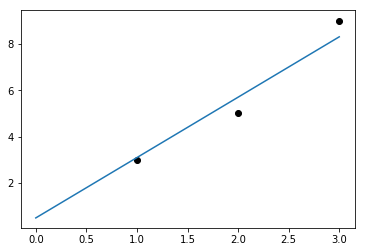

In [54]:
plt.scatter(x, y, c='k')
plt.plot([0,3], [b, w*3+b])

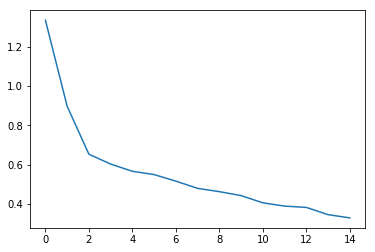

In [70]:
plt.plot(mse_log)

- 값을 미세하게 조정해 보자

In [71]:
### 초기값 설정
w = 2
b = 1
pred_y = w*x + b
delta_y = y - pred_y
mse = np.sum(delta_y**2)/len(y)
mse_log = [mse]

delta=0.001

for i in range(10000):
    new_w = w
    new_b = b
    
    mse_1 = np.sum((y-((w+delta)*x+b))**2)/len(y)
    mse_2 = np.sum((y-((w-delta)*x+b))**2)/len(y)
    mse_3 = np.sum((y-(w*x+(b+delta)))**2)/len(y)
    mse_4 = np.sum((y-(w*x+(b-delta)))**2)/len(y)
    t_mse = np.array([mse_1, mse_2, mse_3, mse_4])
    
    if mse < np.min(t_mse): break
    
    if mse_1<=mse_2 and mse_1<mse:
        new_w = w+delta
    elif mse_1>mse_2 and mse_2<mse:
        new_w = w-delta
        
    if mse_3<=mse_4 and mse_3<mse:
        new_b = b+delta
    elif mse_3>mse_4 and mse_4<mse:
        new_b = b-delta
        
    w = new_w
    b = new_b
    mse = np.sum((y-(w*x+b))**2)/len(y)
    mse_log.append(mse)
    
print('%05d> %.5f, %.5f, %.5f' % (i, w, b, mse))

01774> 2.99600, -0.32500, 0.22223


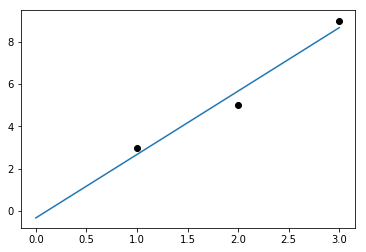

In [56]:
plt.scatter(x, y, c='k')
plt.plot([0,3], [b, w*3+b])

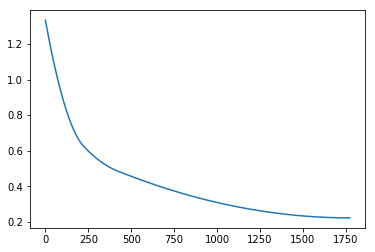

In [72]:
plt.plot(mse_log)

- 선형회귀 결과와 비교

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
model.coef_, model.intercept_

(array([3.]), -0.33333333333333215)

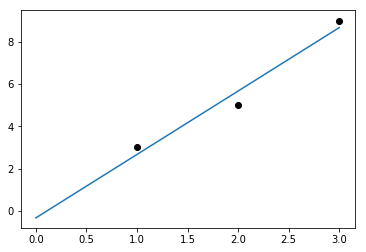

In [41]:
plt.scatter(x, y, c='k')
plt.plot([0,3], [model.intercept_, model.coef_[0]*3+model.intercept_])

### 입력값의 속성이 여러개일 때
<img src='https://miro.medium.com/max/1280/1*n9_4oGTvkmve9ZM07kkQXw.png' />
(출처: https://becominghuman.ai/from-perceptron-to-deep-neural-nets-504b8ff616e)

- 앞에서 x=[1,2,3] 과 같이 한 항목이 숫자 하나였다.
- 키와 몸무게를 가지고 나이를 예측하는 문제를 생각해 보자.
- 그러면 입력값은 (키, 몸무게) 이고, 결과값은 나이 가 된다.
> - X = [[170,68], [162,53], [182,77]]
> - y = [22, 28, 31]
> - 키를 x1, 몸무게를 x2 라고 하자. (각각을 속성이라 한다.)
> - 예측값 = w1 \* x1 + w2 \* x2 + b
- 이와 같이 속성이 두개이므로, 가중치도 w1, w2 두개가 된다.

<img src='도표02.jpg' />

In [57]:
X = np.array([[170,68], [162,53], [182,77]])
y = np.array([22,28,31])

In [59]:
w = [0.1, 0.2]
b = 0.3

pred_y = np.sum(X*w, axis=1) + b
pred_y

array([30.9, 27.1, 33.9])

In [60]:
mse = np.sum((y-pred_y)**2)/len(y)
mse

29.476666666666677

- 행렬식을 사용해 보자

In [61]:
pred_y = X@w + b
mse = np.sum((y-pred_y)**2)/len(y)
mse

29.476666666666677

- 인자값을 변경해 보자

In [62]:
w = [0.1+0.01, 0.2]
b = 0.3

pred_y = np.sum(X*w, axis=1) + b
mse = np.sum((y-pred_y)**2)/len(y)
mse

45.05226666666662

In [63]:
w = [0.1-0.01, 0.2]
b = 0.3

pred_y = np.sum(X*w, axis=1) + b
mse = np.sum((y-pred_y)**2)/len(y)
mse

19.78560000000002

In [65]:
w = [0.1, 0.2]
b = 0.3 + 0.01

pred_y = np.sum(X*w, axis=1) + b
mse = np.sum((y-pred_y)**2)/len(y)
mse

29.549433333333344

In [66]:
w = [0.1, 0.2]
b = 0.3 - 0.01

pred_y = np.sum(X*w, axis=1) + b
mse = np.sum((y-pred_y)**2)/len(y)
mse

29.40410000000001

### 분류 문제에 적용
- 입력값은 그대로 사용하되, 결과값을 청소년(0), 어른(1) 을 판별하는 문제로 바꾸어 보자.
> - X = [[170,68], [162,53], [182,77]]
> - y = [0, 0, 1]
- 목표값이 0 또는 1이므로, 시그모이드 함수를 적용하는 것이 좋아 보인다.

<img src='도표03.jpg' />

In [73]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0,0.5,'output value')

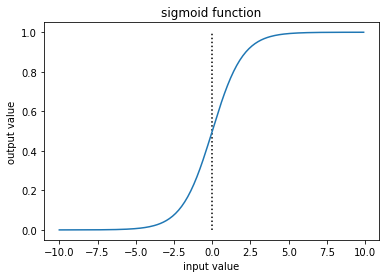

In [74]:
plt.plot(np.arange(-10,10,0.1), sigmoid(np.arange(-10,10,0.1)))
plt.vlines([0], 0, 1, linestyles=':')
plt.title('sigmoid function')
plt.xlabel('input value')
plt.ylabel('output value')

In [75]:
X = np.array([[170,68],
              [162,53],
              [182,77]])
y = np.array([0,0,1])

In [76]:
w = [0.1, 0.2] # [w1, w2] 의 초기값 설정
b = 0.3

In [80]:
중간예측값 = X@w + b
print(중간예측값)

[30.9 27.1 33.9]


In [81]:
예측값 = sigmoid(중간예측값)
print(예측값)

[1. 1. 1.]


In [82]:
mse = np.square(y - 예측값).mean()
print(mse)

0.6666666666655076


- 로지스틱회귀 적용

In [83]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
model.coef_, model.intercept_

(array([[-0.28302345,  0.68791342]]), array([-0.01422816]))

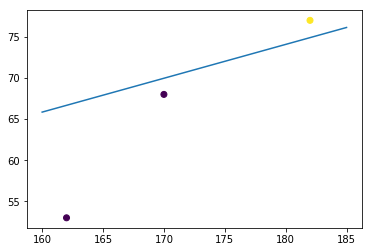

In [100]:
plt.scatter(X[:,0], X[:,1], c=y)
rng = np.array([160,185])
plt.plot(rng, -(rng*model.coef_[0,0]+model.intercept_[0])/model.coef_[0,1])

- 위에서 구한 w 와 b 값으로 mse 를 구해보자

In [101]:
w = [-0.28, 0.69] # [w1, w2] 의 초기값 설정
b = -0.01

In [102]:
중간예측값 = X@w + b
print(중간예측값)

[-0.69 -8.8   2.16]


In [103]:
예측값 = sigmoid(중간예측값)
print(np.round(예측값,3))

[0.334 0.    0.897]


In [104]:
mse = np.square(y - 예측값).mean()
print(mse)

0.04075659003300163


- 정규화 적용

In [105]:
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
X_norm

array([[-0.16222142,  0.20203051],
       [-1.13554995, -1.31319831],
       [ 1.29777137,  1.1111678 ]])

In [106]:
model = LogisticRegression()
model.fit(X_norm, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
model.coef_, model.intercept_

(array([[0.6153933 , 0.44151608]]), array([-0.31445891]))

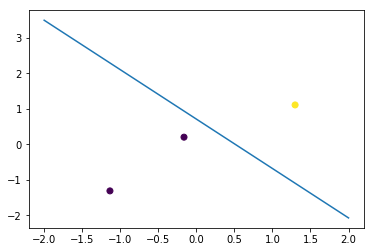

In [110]:
plt.scatter(X_norm[:,0], X_norm[:,1], c=y)
rng = np.array([-2,2])
plt.plot(rng, -(rng*model.coef_[0,0]+model.intercept_[0])/model.coef_[0,1])

### 이진 크로스 엔트로피 (Binary Cross Entropy)
$$ cost = -\frac{1}{N} \cdot \sum_{i=0}^{N-1} [y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i})] $$

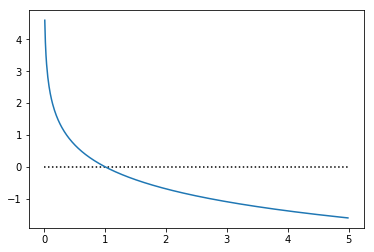

In [43]:
x = np.arange(0.01, 5, 0.01)
y = -np.log(x)

plt.plot(x, y)
plt.hlines([0], 0, 5, linestyles=":")

In [111]:
X = np.array([[170,68],
              [162,53],
              [182,77]])
y = np.array([0,0,1])

In [112]:
w = [0.1, 0.2] # [w1, w2] 의 초기값 설정
b = 0.3

In [113]:
중간예측값 = X@w + b
print(중간예측값)

[30.9 27.1 33.9]


In [114]:
예측값 = sigmoid(중간예측값)
print(예측값)

[1. 1. 1.]


In [116]:
cost = -np.mean(y*np.log(예측값) + (1-y)*np.log(1-예측값))
print(cost)

19.334002171940686


In [125]:
w = [-0.28302345, 0.68791342]
b = -0.01422816

In [126]:
중간예측값 = X@w + b
print(중간예측값)

[-1.3501021  -9.4046158   1.44483728]


In [127]:
예측값 = sigmoid(중간예측값)
print(예측값)

[2.05853680e-01 8.23363279e-05 8.09202614e-01]


In [128]:
cost = -np.mean(y*np.log(예측값) + (1-y)*np.log(1-예측값))
print(cost)

0.14742527844183936
